# Filter lightcurve

2 of 3

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download


In [2]:
download_chandra_obsid 1712,3103 evt2

mv -f 1712/primary/acisf01712N005_evt2.fits.gz .
gunzip -f acisf01712N005_evt2.fits.gz
rmdir -p 1712/primary

mv -f 3103/primary/acisf03103N005_evt2.fits.gz .
gunzip -f acisf03103N005_evt2.fits.gz
rmdir -p 3103/primary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       16 Mb  ####################          < 1 s  64348.9 kb/s


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits      945 Kb  ####################          < 1 s  22951.2 kb/s



In [3]:
dmcopy "acisf01712N005_evt2.fits[energy=500:7000,ccd_id=7]" evt2_c7.fits  cl+

[1] 36670
[1]+  Done                    ds9 evt2_c7.fits -bin factor 2 -scale log -saveimage png ds9_01.png


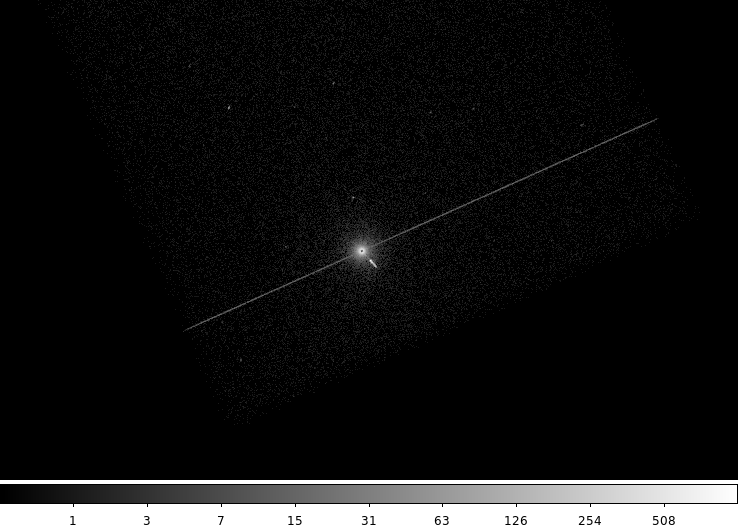

In [4]:
ds9 evt2_c7.fits -bin factor 2 -scale log -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## Remove bright source

In [5]:
cat << EOM > exclude.reg
# Region file format: CIAO version 1.0
rotbox(4200.3328,4137.9892,1129.5056,74.07019,24.22333)
circle(4076.5,4088.5,316)
circle(4296.5,5024.5,48)
EOM

[1] 36711
[1]+  Done                    ds9 evt2_c7.fits -region exclude.reg -bin factor 4 -scale log -saveimage png ds9_02.png


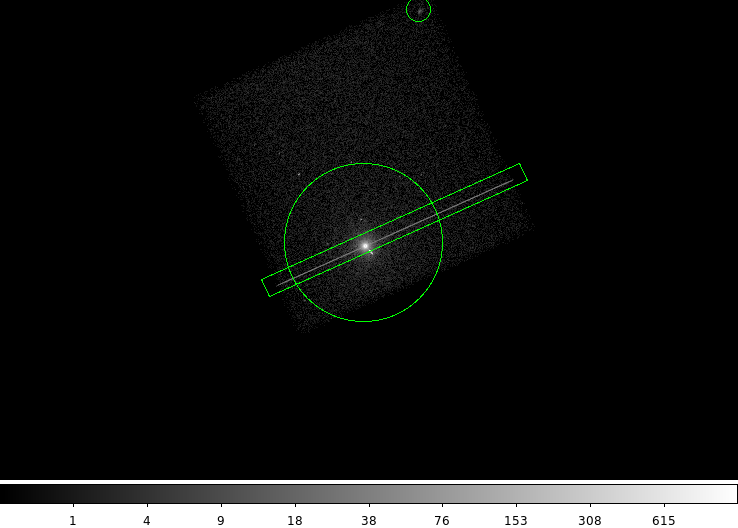

In [6]:
ds9 evt2_c7.fits -region exclude.reg -bin factor 4 -scale log -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## Create lightcurve


In [7]:
pset dmextract "evt2_c7.fits[exclude sky=region(exclude.reg)][bin time=::200]" 
pset dmextract outfile=lc_c7.fits
pset dmextract opt=ltc1
dmextract mode=h clob+

## Analyze the lightcurve using lc_sigma_clip()

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 3
  minlength      = 3
  plot           = True
  rateaxis       = y
  color          = lime

Total number of bins in lightcurve   = 153
Max length of one bin                = 197.467 s
Num. bins with a smaller exp. time   = 2
Num. bins with exp. time = 0         = 13
Number of bins with a rate of 0 ct/s = 13

Rate filter:  -0.10802522562966088 <= count_rate < 1.018553352222236 
Mean level of filtered lightcurve = 0.45526406329628755 ct/s

         1139.4281249999976 bins.
         Replacing with a width of 0.0113943 count/s
         This may indicate that the lightcurve contains strong flares that
         require manual filtering.

GTI limits calculated using a count-rate filter:
  (count_rate>-0.10802522562966088 && count_rate<1.018553352222236)

The corresponding times are:
  ((time >= 77379470.949928) && (time < 77399470.949928)) ; 19.59 ksec, bin 1
  ((tim

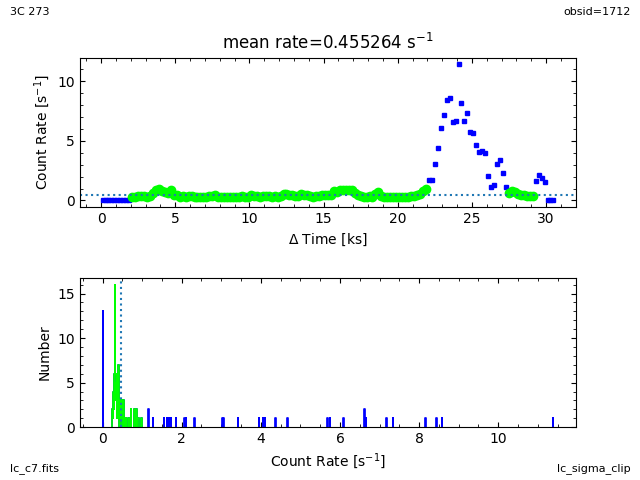

In [8]:
cat << EOM > c1.py
from lightcurves import *
lc_sigma_clip("lc_c7.fits")

import matplotlib.pylab as plt
plt.savefig("plot_01.png")
#print_window("chips_01.png","export.clobber=True")
EOM

python c1.py
display < plot_01.png 

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 3
  minlength      = 3
  plot           = True
  rateaxis       = y
  color          = lime

Total number of bins in lightcurve   = 130
Max length of one bin                = 197.467 s
Num. bins with a smaller exp. time   = 2
Num. bins with exp. time = 0         = 13
Number of bins with a rate of 0 ct/s = 13

Rate filter:  -0.10802522562966088 <= count_rate < 1.018553352222236 
Mean level of filtered lightcurve = 0.45526406329628755 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>-0.10802522562966088 && count_rate<1.018553352222236)

The corresponding times are:
  ((time >= 77379470.949928) && (time < 77399470.949928)) ; 19.59 ksec, bin 1
  ((time >= 77404870.949928) && (time < 77406670.949928)) ; 1.78 ksec, bin 2

  Exposure time of lightcurve = 27.45 ks
  Filtered exposure time      = 21.36 ks
  DTCOR value                 = 0.987337


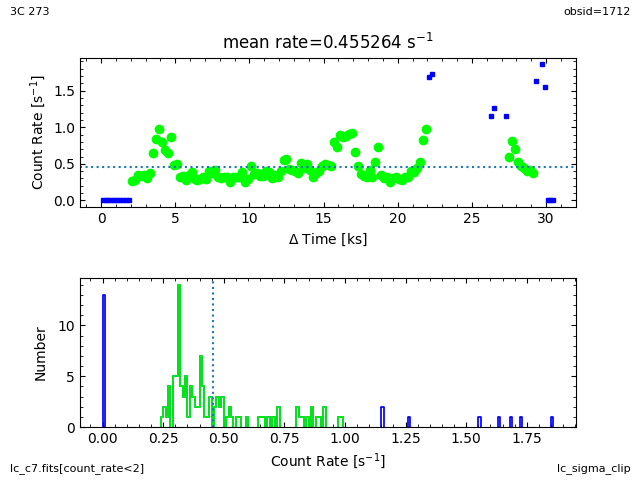

In [9]:
cat << EOM > c2.py
from lightcurves import *
lc_sigma_clip("lc_c7.fits[count_rate<2]")

import matplotlib.pylab as plt
plt.savefig("plot_02.png")

#print_window("chips_02.png","export.clobber=True")
quit()
EOM

python c2.py
display < plot_02.png 

## Running lc_sigma_clip via the deflare script

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 3
  minlength      = 3
  outfile        = lc_c7.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 130
Max length of one bin                = 197.467 s
Num. bins with a smaller exp. time   = 2
Num. bins with exp. time = 0         = 13
Number of bins with a rate of 0 ct/s = 13

Rate filter:  -0.10802522562966088 <= count_rate < 1.018553352222236 
Mean level of filtered lightcurve = 0.45526406329628755 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>-0.10802522562966088 && count_rate<1.018553352222236)

The corresponding times are:
  ((time >= 77379470.949928) && (time < 77399470.949928)) ; 19.59 ksec, bin 1
  ((time >= 77404870.949928) && (time < 77406670.949928)) ; 1.78 ksec, bin 2

  Exposure time of lightcurve = 27.45 ks
  Filtere

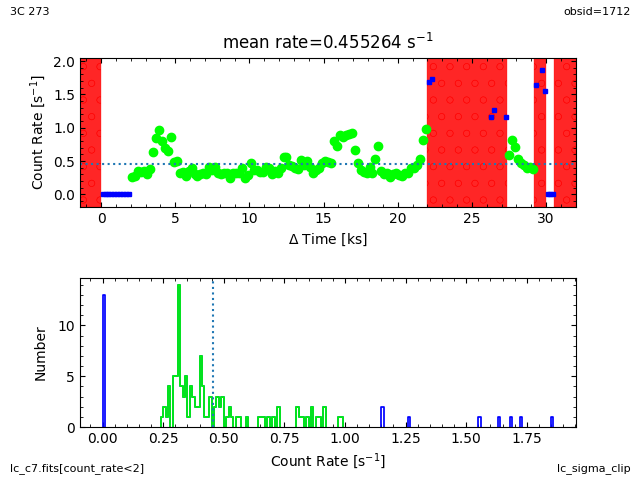

In [10]:
echo yes | deflare "lc_c7.fits[count_rate<2]" outfile=lc_c7.gti method=sigma \
  plot=yes save=deflare_01.png 

display < deflare_01.png

## Change obsid -- 3103


In [11]:
celldetect acisf03103N005_evt2.fits"[energy=500:7000]" \
  outfile=cell.src ellsig=5 mode=h clob+ fixed=12

[1] 37050
[1]+  Done                    ds9 acisf03103N005_evt2.fits"[events,energy=500:7000]" -region cell.src -bin factor 2 -scale log -smooth -saveimage png ds9_03.png


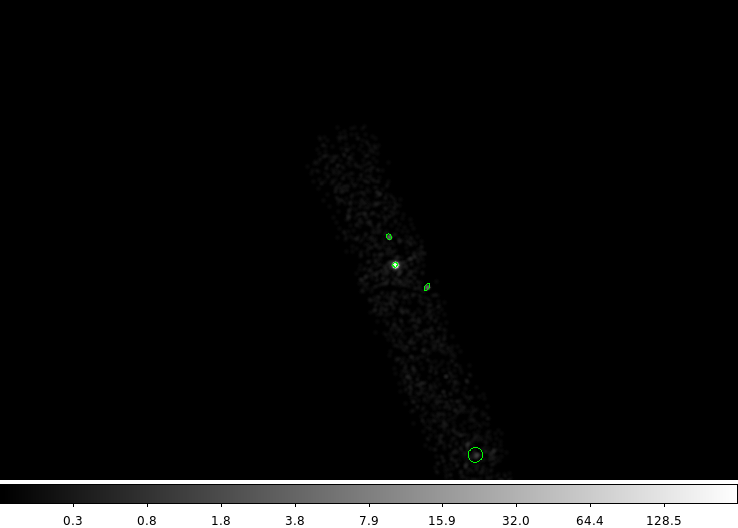

In [12]:
ds9 acisf03103N005_evt2.fits"[events,energy=500:7000]" -region cell.src \
  -bin factor 2 -scale log  -smooth \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

In [13]:
dmextract acisf03103N005_evt2.fits"[exclude sky=region(cell.src)][bin time=::500]" \
  acis3103_500s.lc op=ltc1 mode=h clob+

## Okay, now back to the thread

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 3
  minlength      = 3
  outfile        = 3103.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 83
Max length of one bin                = 453.474 s
Num. bins with a smaller exp. time   = 8
Num. bins with exp. time = 0         = 2
Number of bins with a rate of 0 ct/s = 2

Rate filter:  0.3941340607871302 <= count_rate < 0.6167127686408891 
Mean level of filtered lightcurve = 0.5054234147140096 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>0.3941340607871302 && count_rate<0.6167127686408891)

The corresponding times are:
  ((time >= 126705607.39342) && (time < 126707107.39342)) ; 0.97 ksec, bin 1
  ((time >= 126707607.39342) && (time < 126746107.39342)) ; 34.79 ksec, bin 2

  Exposure time of lightcurve = 36.21 ks
  Filtered expos

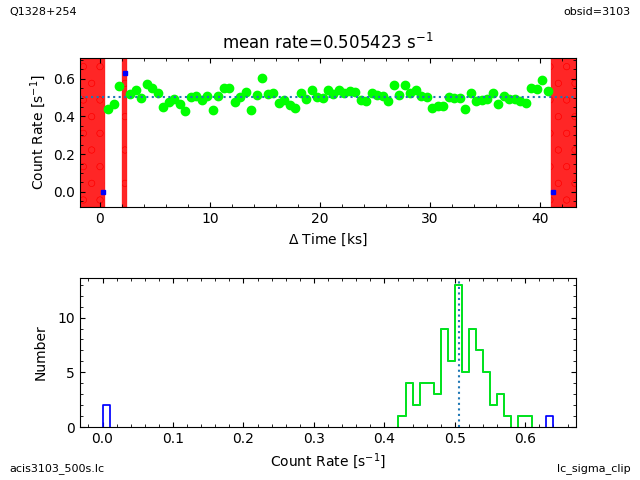

In [14]:
echo yeas | deflare acis3103_500s.lc outfile=3103.gti method="sigma" plot=yes save=deflare2.png
display < deflare2.png

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 2
  minlength      = 3
  outfile        = 3103_1.6.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 83
Max length of one bin                = 453.474 s
Num. bins with a smaller exp. time   = 8
Num. bins with exp. time = 0         = 2
Number of bins with a rate of 0 ct/s = 2

Rate filter:  0.45622026371264074 <= count_rate < 0.5574863617647468 
Mean level of filtered lightcurve = 0.5068533127386937 ct/s

GTI limits calculated using a time filter:
  ((time >= 126707607.39342) && (time < 126709107.39342)) ; 1.36 ksec, bin 1
  ((time >= 126711107.39342) && (time < 126712607.39342)) ; 1.36 ksec, bin 2
  ((time >= 126713107.39342) && (time < 126715107.39342)) ; 1.81 ksec, bin 3
  ((time >= 126715607.39342) && (time < 126718607.39342)) ; 2.72 ksec, bin 4
  (

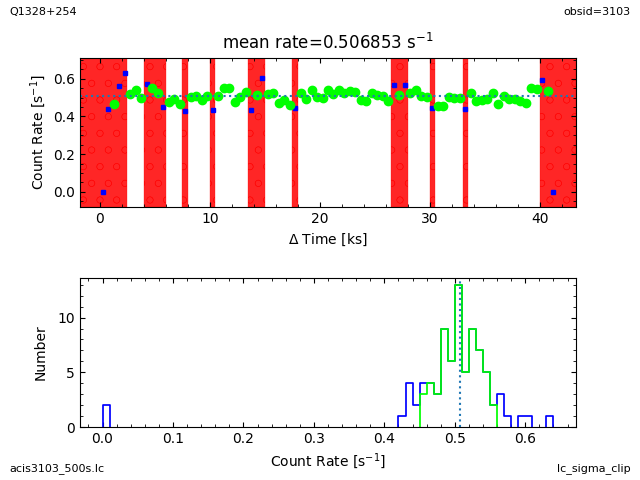

In [15]:
echo yes | deflare acis3103_500s.lc outfile=3103_1.6.gti method="sigma" plot=yes nsigma=2 save=deflare_03.png
display < deflare_03.png

## Filtering the event file

### 1. Using lc_sigma_clip

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  clipping       = symmetric
  sigma          = 3
  minlength      = 3
  outfile        = lc_c7.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 130
Max length of one bin                = 197.467 s
Num. bins with a smaller exp. time   = 2
Num. bins with exp. time = 0         = 13
Number of bins with a rate of 0 ct/s = 13

Rate filter:  -0.10802522562966088 <= count_rate < 1.018553352222236 
Mean level of filtered lightcurve = 0.45526406329628755 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>-0.10802522562966088 && count_rate<1.018553352222236)

The corresponding times are:
  ((time >= 77379470.949928) && (time < 77399470.949928)) ; 19.59 ksec, bin 1
  ((time >= 77404870.949928) && (time < 77406670.949928)) ; 1.78 ksec, bin 2

  Exposure time of lightcurve = 27.45 ks
  Filtere

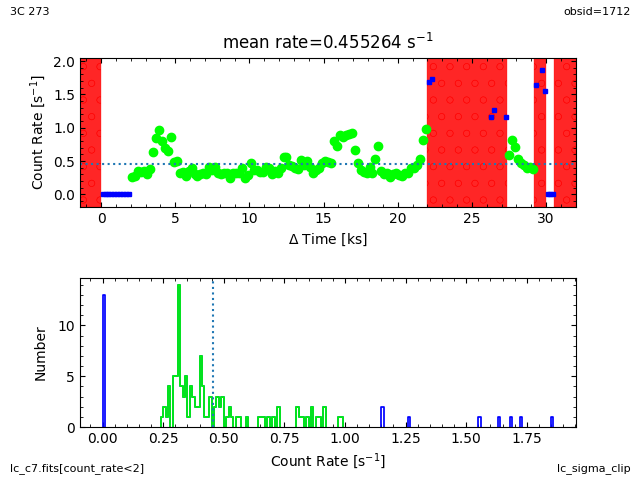

In [16]:
cat << EOM > c3.py
from lightcurves import *
lc_sigma_clip("lc_c7.fits[count_rate<2]", outfile="lc_c7.gti")

import matplotlib.pylab as plt
plt.savefig("plot_03.png")
EOM

python c3.py
display < plot_03.png 

In [17]:
dmcopy "evt2_c7.fits[@lc_c7.gti]" evt2_c7_lc.fits clob+

### 2. Using dmgti

In [18]:
pset dmgti infile=lc_c7.fits
pset dmgti outfile=lc_c7.dmgti.gti
pset dmgti userlimit="((time >= 77379470.949928) && (time < 77399470.949928))||((time >= 77404870.949928) && (time < 77406670.949928))"
dmgti mode=h clobber=yes

In [19]:
dmcopy "evt2_c7.fits[@lc_c7.dmgti.gti]" evt2_c7_dmgti.fits clob+

### 3. Using a DM filter

In [20]:
dmcopy "evt2_c7.fits[time=77379470.949928:77399470.949928,77404870.949928:77406670.949928]" \
      evt2_c7_dmcopy.fits clob+

## Check `EXPOSURE` time

In [21]:
dmkeypar evt2_c7_lc.fits EXPOSURE echo+

21364.401548125


In [22]:
dmkeypar evt2_c7_dmgti.fits EXPOSURE echo+

21364.401548125


In [23]:
dmkeypar evt2_c7_dmcopy.fits EXPOSURE echo+

21364.401548125


# Cleanup


In [24]:
/bin/rm -f acisf01712N005_evt2.fits acisf03103N005_evt2.fits